## Object Detect
###Contino Gaia Natalj - Guzzardella Marianna

The objective is to train a deep learning model to perform image classification
on a dataset characterized by a domain shift between training and test data.
  

In [ ]:
# Import Torch
import torch
# Setup device
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(dev)

cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Path for training and testing directory
train_p="/content/drive/MyDrive/ccaiunict-2023/train/"
test_p="/content/drive/MyDrive/ccaiunict-2023/test/"

In [ ]:
import csv
def read_file_csv(file_path):
    data = {}

    with open(file_path, 'r') as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader)

        for row in csv_reader:
            x1 = float(row[1])
            y1 = float(row[2])
            x2 = float(row[3])
            y2 = float(row[4])
            t =[x1,y1,x2,y2]

            key = str(row[0])
            data[key] = t

    return data

In [ ]:
test_csv_path = '/content/drive/MyDrive/ccaiunict-2023/test.csv'
train_csv_path = '/content/drive/MyDrive/ccaiunict-2023/train.csv'
test_csv = read_file_csv(test_csv_path)
train_csv = read_file_csv(train_csv_path)
print(test_csv)
print(train_csv)

{'000.jpg': [134.0, 79.0, 261.0, 206.0], '001.jpg': [152.0, 118.0, 279.0, 245.0], '002.jpg': [121.0, 153.0, 248.0, 280.0], '003.jpg': [152.0, 135.0, 279.0, 262.0], '004.jpg': [220.0, 60.0, 347.0, 187.0], '005.jpg': [187.0, 52.0, 314.0, 179.0], '006.jpg': [220.0, 43.0, 347.0, 170.0], '007.jpg': [105.0, 142.0, 232.0, 269.0], '008.jpg': [220.0, 77.0, 347.0, 204.0], '009.jpg': [160.0, 184.0, 287.0, 311.0], '010.jpg': [133.0, 50.0, 260.0, 177.0], '011.jpg': [106.0, 127.0, 233.0, 254.0], '012.jpg': [175.0, 165.0, 302.0, 292.0], '013.jpg': [119.0, 142.0, 246.0, 269.0], '014.jpg': [170.0, 90.0, 297.0, 217.0], '015.jpg': [148.0, 179.0, 275.0, 306.0], '016.jpg': [166.0, 127.0, 293.0, 254.0], '017.jpg': [175.0, 168.0, 302.0, 295.0], '018.jpg': [207.0, 62.0, 334.0, 189.0], '019.jpg': [156.0, 188.0, 283.0, 315.0], '020.jpg': [210.0, 133.0, 337.0, 260.0], '021.jpg': [171.0, 135.0, 298.0, 262.0], '022.jpg': [120.0, 122.0, 247.0, 249.0], '023.jpg': [133.0, 142.0, 260.0, 269.0], '024.jpg': [156.0, 119.

#### Pre-process Data
Data preprocessing is an essential step in machine learning to prepare the data before feeding it into a model. It involves transforming, cleaning, and normalizing the data to improve the quality and facilitate effective learning.
In this step we crop the image using the measures imported from the csv file.

In [ ]:
import os

# Directory di output per le maschere
output_dir_train = '/content/drive/MyDrive/ccaiunict-2023/train_crop'

for i in ['00', '01','02', '03', '04', '05', '06', '07']:
    output_dir_train = '/content/drive/MyDrive/ccaiunict-2023/train_crop'+ '/'+i
    # Controllo se la directory di output esiste, altrimenti la creo
    if not os.path.exists(output_dir_train):
      os.makedirs(output_dir_train)


output_dir_test = '/content/drive/MyDrive/ccaiunict-2023/test_crop/test1'
if not os.path.exists(output_dir_test):
      os.makedirs(output_dir_test)

In [ ]:
import cv2
import numpy as np
for k in (test_csv):
   image_path = test_p + '/' + 'test1' + '/' + k
   #image_path = image_paths[0]
   image = cv2.imread(str(image_path))
   t=test_csv[k]
   x1 = int(t[0])
   y1 = int(t[1])
   x2 = int(t[2])
   y2= int(t[3])
   cropped_image = image[y1:y2, x1:x2]
   path =  '/content/drive/MyDrive/ccaiunict-2023/test_crop/test1' +'/' + k
   cv2.imwrite(path,cropped_image)

In [ ]:
for k in (train_csv):
  if(k != '02/02_082.png' and k!= '04/04_086.png'):
   image_path = train_p + k
   image = cv2.imread(str(image_path))
   t=train_csv[k]
   x1 = int(t[0])
   y1 = int(t[1])
   x2 = int(t[2])
   y2= int(t[3])
   cropped_image = image[y1:y2, x1:x2]
   path = '/content/drive/MyDrive/ccaiunict-2023/train_crop' + '/'+ k
   if cropped_image is not None:
    cv2.imwrite(path,cropped_image)

In [ ]:
import torch
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
import os
test_path =  '/content/drive/MyDrive/ccaiunict-2023/test_crop/'
train_path =  '/content/drive/MyDrive/ccaiunict-2023/train_crop/'
# Get Dataset
train_images_dataset = ImageFolder(os.path.join(train_path), T.ToTensor())

Whit this code it is calculated the mean and the std for normalize the images.

In [ ]:
imgs = [item[0] for item in train_images_dataset]

imgs = torch.stack(imgs, dim=0).numpy()

# Calcoliamo la media su ogni canale di colore (r,g,b)
mean_r = imgs[:,0,:,:].mean()
mean_g = imgs[:,1,:,:].mean()
mean_b = imgs[:,2,:,:].mean()

print(mean_r, mean_g, mean_b)

# Calcoliamo la deviazione standard su ogni canale di colore (r,g,b)
std_r = imgs[:,0,:,:].std()
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()

print(std_r, std_g, std_b)

0.6381528 0.58544874 0.5647813
0.20666547 0.2208181 0.23533008


In [ ]:
import torchvision.transforms as T
from torch.utils.data import DataLoader, Subset
import random

norm_mean = (mean_r, mean_g, mean_b)
norm_std = (std_r, std_g, std_b)

train_transform = T.Compose([
    T.ColorJitter(contrast=0.5),
    T.RandomRotation(30),
    T.ToTensor(),
    T.Normalize(norm_mean, norm_std)
])

test_transform = T.Compose([
    T.ColorJitter(contrast=0.5),
    T.RandomRotation(30),
    T.ToTensor(),
    T.Normalize(norm_mean, norm_std)
])

train_dataset = ImageFolder(os.path.join(train_path), transform=train_transform)
test_dataset = ImageFolder(os.path.join(test_path), transform=test_transform)
num_classes = len(train_dataset.classes)

print(f"Num. classes: {num_classes}")
print(f"Num. train samples: {len(train_dataset)}")
print(f"Num. test samples: {len(test_dataset)}")


num_train = len(train_dataset)
num_test = len(test_dataset)

# let's split our training set into train and validation.

# List of indexes on the training set
train_idx = list(range(num_train))
# List of indexes on the test set
test_idx = list(range(num_test))
# Shuffle training set
random.shuffle(train_idx)

# Validation fraction
val_frac = 0.1

# Compute number of samples
num_val = int(num_train*val_frac)
num_train = num_train - num_val

# Split training set
val_idx = train_idx[num_train:]
train_idx = train_idx[:num_train]

#Split train_dataset into training and validation
val_dataset = Subset(train_dataset, val_idx)
train_dataset = Subset(train_dataset, train_idx)


train_loader = DataLoader(train_dataset, batch_size=128, num_workers=0, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=128, num_workers=0, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=128, num_workers=0, shuffle=False)

Num. classes: 8
Num. train samples: 1598
Num. test samples: 800


In [ ]:
loaders = {"train": train_loader,
           "val": val_loader,
           "test": test_loader}

##AlexNet
For the training of the dataset it is used AlexNet Network:
The two layers self.dropout1 and self.dropout2 have been added after the two fully connected layers (self.fc1 and self.fc2). These dropout layers are useful for reducing overfitting and increasing the ability to generalize the model.

The final output of the model is obtained by returning x after the last fully connected layer (self.fc3).

In [ ]:
import torch.nn as nn
import torchvision.models as models
class AlexNet(nn.Module):

    def __init__(self, num_classes=8):
        super().__init__()
        # Load AlexNet model
        alexnet = models.alexnet(pretrained=True)

        self.features = alexnet.features
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.relu1 = nn.ReLU(inplace=True)
        self.dropout1 = nn.Dropout()
        self.fc2 = nn.Linear(4096, 4096)
        self.relu2 = nn.ReLU(inplace=True)
        self.dropout2 = nn.Dropout()
        self.fc3 = nn.Linear(4096, num_classes)

    def forward(self, x):

        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x



In [ ]:
# Create model
model=AlexNet()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Test model output
model.eval()
test_input = train_dataset[0][0].unsqueeze(0)
print("Model output size:", model(test_input).size())



Model output size: torch.Size([1, 8])


In [ ]:
model = model.to(dev)

In [ ]:
# Define a loss function
criterion = nn.CrossEntropyLoss()

In [ ]:
# optimizer
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
# Initialize training history lists
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []
test_loss_history = []
test_acc_history = []


In [ ]:
# Start training loop
num_epoch=15
for epoch in range(num_epoch):
    train_loss_sum = 0
    train_acc_sum = 0
    val_loss_sum = 0
    val_acc_sum = 0
    test_loss_sum = 0
    test_acc_sum = 0

    for split in ["train", "val", "test"]
        if split == "train":
            model.train()
        else:
            model.eval()

        for data in loaders[split]:
            inputs, labels = data

            inputs = inputs.to(dev)
            labels = labels.to(dev)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            if split == "train":
                train_loss_sum += loss.item()
            elif split == "val":
                val_loss_sum += loss.item()
            elif split == "test":
                test_loss_sum += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            accuracy = (predicted == labels).sum().item() / labels.size(0)

            if split == "train":
                train_acc_sum += accuracy
            elif split == "val":
                val_acc_sum += accuracy
            elif split == "test":
                test_acc_sum += accuracy

            if split == "train":
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

    train_loss_avg = train_loss_sum /len(loaders["train"])
    train_acc_avg = train_acc_sum /len(loaders["train"])
    val_loss_avg = val_loss_sum / len(loaders["val"])
    val_acc_avg = val_acc_sum / len(loaders["val"])
    test_loss_avg = test_loss_sum / len(loaders["test"])
    test_acc_avg = test_acc_sum / len(loaders["test"])

    train_loss_history.append(train_loss_avg)
    train_acc_history.append(train_acc_avg)
    val_loss_history.append(val_loss_avg)
    val_acc_history.append(val_acc_avg)
    test_loss_history.append(test_loss_avg)
    test_acc_history.append(test_acc_avg)

print(f"Train accuracy: {train_acc_history[-1]:.4f}")
print(f"Train loss: { train_loss_history[-1]:.4f}")
print(f"Test loss: {test_loss_history[-1]:.4f}")


Train accuracy: 0.9948
Train loss: 0.0236
Test loss: 4.5868


In [ ]:
name_class = {0: 'plug', 1 : 'cellphone', 2 :'scissor', 3 : 'bulb', 4: 'drink', 5: 'glasses', 6: 'ball', 7: 'cup'}

In [ ]:
# TEST
model.eval()

cl_pred = []

for idx, (input, label) in enumerate(test_dataset):
  img_name = os.path.basename(test_dataset.imgs[idx][0])
  with torch.no_grad():
    output = model(input.unsqueeze(0).to(dev))
  _,pred = output.max(1)
  pred = pred.item()
  cl_pred.append([img_name,pred])

In [ ]:
print(cl_pred)

[['000.jpg', 0], ['001.jpg', 0], ['002.jpg', 0], ['003.jpg', 4], ['004.jpg', 0], ['005.jpg', 5], ['006.jpg', 0], ['007.jpg', 7], ['008.jpg', 0], ['009.jpg', 2], ['010.jpg', 2], ['011.jpg', 0], ['012.jpg', 4], ['013.jpg', 0], ['014.jpg', 7], ['015.jpg', 6], ['016.jpg', 2], ['017.jpg', 4], ['018.jpg', 6], ['019.jpg', 2], ['020.jpg', 1], ['021.jpg', 5], ['022.jpg', 5], ['023.jpg', 1], ['024.jpg', 0], ['025.jpg', 7], ['026.jpg', 4], ['027.jpg', 0], ['028.jpg', 5], ['029.jpg', 5], ['030.jpg', 4], ['031.jpg', 1], ['032.jpg', 1], ['033.jpg', 5], ['034.jpg', 7], ['035.jpg', 2], ['036.jpg', 2], ['037.jpg', 6], ['038.jpg', 0], ['039.jpg', 0], ['040.jpg', 6], ['041.jpg', 1], ['042.jpg', 4], ['043.jpg', 4], ['044.jpg', 4], ['045.jpg', 0], ['046.jpg', 6], ['047.jpg', 6], ['048.jpg', 0], ['049.jpg', 0], ['050.jpg', 7], ['051.jpg', 0], ['052.jpg', 0], ['053.jpg', 0], ['054.jpg', 7], ['055.jpg', 0], ['056.jpg', 0], ['057.jpg', 4], ['058.jpg', 0], ['059.jpg', 1], ['060.jpg', 0], ['061.jpg', 4], ['062.j

In [ ]:
import csv
# Save results into submission.csv
header = ['image','class']
with open('/content/drive/MyDrive/ccaiunict-2023/submission.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    writer.writerow(header)
    writer.writerows(cl_pred)

/content/drive/MyDrive/ccaiunict-2023/test_crop/test1/022.jpg
Predicted:glasses


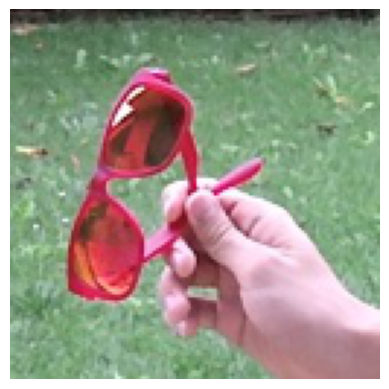

In [ ]:
import random
from PIL import Image
import matplotlib.pyplot as plt
import os

idx = random.randint(0, len(test_dataset)-1)
input, label = test_dataset[idx]
print(test_dataset.imgs[idx][0])
filename = os.path.basename(test_dataset.imgs[idx][0])
img = Image.open(test_dataset.imgs[idx][0]).convert("RGB")

# Show image
plt.imshow(img)
plt.axis('off')

# Predict class
model.eval()
with torch.no_grad():
    output = model(input.unsqueeze(0).to(dev))
_,pred = output.max(1)
pred = pred.item()
print(f"Predicted:{name_class[pred]}")